In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

user = pd.read_csv("/home/victoria/Downloads/reporte_metadata/auth_user.tsv", sep="\t", index_col=0)
submission = pd.read_csv("/home/victoria/Downloads/reporte_metadata/upload_submission.tsv", sep="\t", index_col=0, parse_dates=["uploaded_at"])
competition = pd.read_csv("/home/victoria/Downloads/reporte_metadata/upload_competition.tsv", sep="\t")

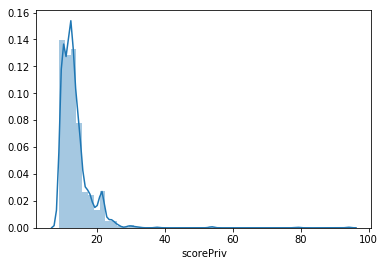

In [13]:
ids_competition_6 = submission[submission["competition_id"] == 6]["user_id"].unique()

s6 = submission[submission["competition_id"] == 6][["scorePriv", "user_id"]]

user[["first_name","last_name","username","email"]].loc[ids_competition_6]

# Ordeno por score
s6_sorted = s6.sort_values(by=['scorePriv'], ascending=False)

# Elimino 4 outliers con score demasiado alto
s6_sorted_filtered = s6_sorted.drop(s6_sorted.index[:4])

# Veamos la distribución de puntajes
sns.distplot(s6_sorted_filtered.scorePriv)

In [14]:
submission.groupby(['competition_id', 'user_id']).count().sort_values(by=['competition_id','uploaded_at'], ascending=False)

uploaded_at  file_itself  score  scorePriv
competition_id user_id                                            
6              385              204          204    204        204
               42               198          198    198        198
               90               138          138    138        138
               219              125          125    125        125
               24                90           90     90         90
               413               75           75     75         75
               365               68           68     68         68
               401               62           62     62         62
               443               55           55     55         55
               362               43           43     43         43
               432               43           43     43         43
               355               35           35     35         35
               457               29           29     29         29
               162               27           27     27         27
               447               26           26     26         26
               452               26           26     26         26
               366               21           21     21         21
               140               20           20     20         20
               466               17           17     17         17
               431               16           16     16         16
               474               14           14     14         14
               442               12           12     12         12
               450               11           11     11         11
               23                10           10     10         10
               382               10           10     10         10
               141                9            9      9          9
               422                9            9      9          9
               471                9            9      9          9
               167                8            8      8          8
               448                8            8      8          8
...                             ...          ...    ...        ...
2              239                8            8      8          8
               243                7            7      7          7
               96                 5            5      5          5
               58                 4            4      4          4
               42                 2            2      2          2
               95                 2            2      2          2
               216                2            2      2          2
               231                2            2      2          2
               122                1            1      1          1
               174                1            1      1          1
               188                1            1      1          1
1              49                20           20     20         20
               81                17           17     17         17
               82                12           12     12         12
               24                11           11     11         11
               55                11           11     11         11
               63                11           11     11         11
               41                10           10     10         10
               87                10           10     10         10
               43                 9            9      9          9
               56                 9            9      9          9
               136                8            8      8          8
               69                 7            7      7          7
               57                 5            5      5          5
               84                 3            3      3          3
               167                3            3      3          3
               51                 2            2      2          2
    

Score promedio:  13.583299460463497
Q1:  10.791343468817873


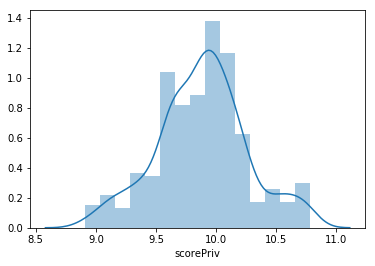

In [15]:
# Score promedio
print("Score promedio: " , np.mean(s6_sorted_filtered.scorePriv))

# Q1
print("Q1: " , s6_sorted_filtered.quantile(0.25).scorePriv)

# Elimino los que tengan puntaje mayor al Q1
s6_sorted_filtered_best_performance = s6_sorted_filtered[s6_sorted_filtered['scorePriv'] < s6_sorted_filtered.quantile(0.25).scorePriv]
sns.distplot(s6_sorted_filtered_best_performance.scorePriv)

In [19]:
# Cuantos usuarios son los que obtuvieron buenos puntajes (en el primer cuartil)
print("Usuarios que obtuvieron buenos puntajes (en el primer cuartil): ", s6_sorted_filtered_best_performance['user_id'].unique().shape[0])

Usuarios que obtuvieron buenos puntajes (en el primer cuartil):  9


In [20]:
# Agrego los nombres de usuarios
users_with_name = s6_sorted_filtered_best_performance.merge(user, left_on='user_id', right_on='id')
users_with_name = users_with_name.sort_values(by='scorePriv')

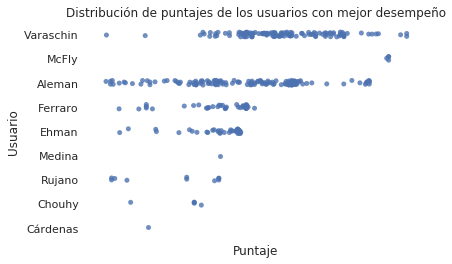

In [184]:
inputdf = users_with_name

# Initialize the figure
f, ax = plt.subplots()
sns.set(style="whitegrid")

# Show each observation with a scatterplot
ax = sns.stripplot(x="scorePriv", y=inputdf["last_name"].astype(str), color="b",
              data=inputdf, jitter=True,
              alpha=.8, zorder=1)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(11.5, 8.5, 0.1))
ax.invert_xaxis()
sns.despine(bottom=True, left=True)

plt.title('Distribución de puntajes de los usuarios con mejor desempeño')
plt.xlabel('Puntaje')
plt.ylabel('Usuario')

plt.savefig('test_plot.eps', format='eps')

In [235]:
submission_per_competition = submission.groupby('competition_id').count()
submission_per_competition['count'] = submission_per_competition['user_id']
submission_per_competition = submission_per_competition[['count']]
submission_per_competition['count']

submission_per_competition['competition_id'] = submission_per_competition.index
submission_per_competition.index.names = ['id']
submission_per_competition = submission_per_competition.merge(competition[['id','name']], left_on='competition_id', right_on='id')

Text(0, 0.5, 'Cantidad de submits')

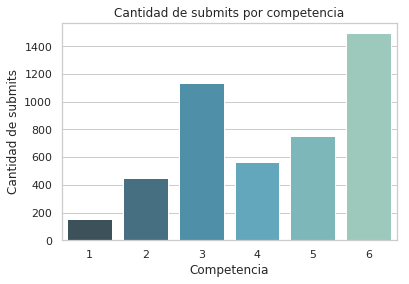

In [252]:
# Number of submits per competition

ax = sns.barplot(x=submission_per_competition['id'], y=submission_per_competition['count'], palette="GnBu_d")

loc, labels = plt.xticks()
#ax.set_xticklabels(labels, rotation=45)

plt.title('Cantidad de submits por competencia')
plt.xlabel('Competencia')
plt.ylabel('Cantidad de submits')

Text(0, 0.5, 'Cantidad de usuarios')

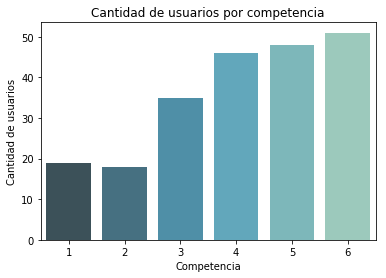

In [47]:
# Number of users per competition
users_per_competition = submission.groupby('competition_id')['user_id'].nunique()


ax = sns.barplot(x=users_per_competition.index, y=users_per_competition.values, palette="GnBu_d")

loc, labels = plt.xticks()
#ax.set_xticklabels(labels, rotation=45)

plt.title('Cantidad de usuarios por competencia')
plt.xlabel('Competencia')
plt.ylabel('Cantidad de usuarios')

In [94]:
c6_submissions = submission[submission["competition_id"] == 6]

time_ordered_c6 = c6_submissions.set_index('uploaded_at').groupby(pd.Grouper(freq='D')).count().sort_values(by='uploaded_at', ascending=False)
time_ordered_c6.rename(columns={'file_itself': 'count'}, inplace=True)

time_ordered_c6['date'] = time_ordered_c6.index

time_ordered_c6['day'] = pd.to_datetime(time_ordered_c6['date']).dt.date

In [93]:
time_ordered_c6[['day', 'count']].to_csv('submission_by_time.csv', index=False)

In [108]:
hour_grouped = c6_submissions.set_index('uploaded_at').groupby(pd.Grouper(freq='H')).count().sort_values(by='uploaded_at', ascending=False)

hour_grouped.rename(columns={'file_itself': 'count'}, inplace=True)

hour_grouped['date'] = hour_grouped.index

hour_grouped['hour'] = pd.to_datetime(hour_grouped['date']).dt.time

hour_grouped = hour_grouped.groupby('hour').sum()

hour_grouped['hour'] = hour_grouped.index

In [109]:
hour_grouped[['hour','count']].to_csv('submission_by_hours.csv', index=False)